In [1]:
import pandas as pd
import requests

In [2]:
url = "https://realtor.p.rapidapi.com/properties/v2/list-sold"

querystring = {"city":"New York City","offset":"0","state_code":"NY","limit":"200","sort":"sold_date"}

headers = {
    'x-rapidapi-key': "b1a61ad468mshb91fbd667f933f2p13d8d9jsn8beeabc3362a",
    'x-rapidapi-host': "realtor.p.rapidapi.com"
    }

response = requests.request("GET", url, headers=headers, params=querystring)

## Functions


In [3]:
def api_property_list_for_sale(api_key, city, state, limit=200):
  # url for api
  url = "https://realtor.p.rapidapi.com/properties/v2/list-for-sale"

  # enter parameters
  querystring = {
    "sort":"relevance","city":city,"offset":"0","limit":limit,"state_code":state 
  }

  # header
  headers = {
    'x-rapidapi-host': "realtor.p.rapidapi.com",
    'x-rapidapi-key': api_key
  }

  # response
  response = requests.request("GET", url, headers=headers, params=querystring)
  return response.json() # json format

In [4]:
def api_property_list_for_sale_propType(api_key, city, state, prop_type, limit=200):
  # url for api
  url = "https://realtor.p.rapidapi.com/properties/v2/list-for-sale"

  # enter parameters
  querystring = {
    "sort":"relevance","city":city,"offset":"0","limit":limit,"state_code":state, "prop_type":prop_type 
  }

  # header
  headers = {
    'x-rapidapi-host': "realtor.p.rapidapi.com",
    'x-rapidapi-key': api_key
  }

  # response
  response = requests.request("GET", url, headers=headers, params=querystring)
  return response.json() # json format

In [5]:
def api_property_list_for_sale_bedsMin(api_key, city, state, beds_min, limit=200):
  # url for api
  url = "https://realtor.p.rapidapi.com/properties/v2/list-for-sale"

  # enter parameters
  querystring = {"city":city,"limit":"200","offset":"0","state_code":state,"beds_min":beds_min,"sort":"relevance"}

  # header
  headers = {
    'x-rapidapi-host': "realtor.p.rapidapi.com",
    'x-rapidapi-key': api_key
  }

  # response
  response = requests.request("GET", url, headers=headers, params=querystring)
  return response.json() # json format

In [6]:
def api_property_list_for_sale_bathsMin(api_key, city, state, baths_min, limit=200):
  # url for api
  url = "https://realtor.p.rapidapi.com/properties/v2/list-for-sale"

  # enter parameters
  querystring = {"city":city,"limit":"200","offset":"0","state_code":state,"sort":"relevance","baths_min":baths_min}

  # header
  headers = {
    'x-rapidapi-host': "realtor.p.rapidapi.com",
    'x-rapidapi-key': api_key
  }

  # response
  response = requests.request("GET", url, headers=headers, params=querystring)
  return response.json() # json format

In [8]:
def api_property_list_for_sale_priceMin(api_key, city, state, price_min, limit=200):
  # url for api
  url = "https://realtor.p.rapidapi.com/properties/v2/list-for-sale"

  # enter parameters
  querystring = {"city":city,"limit":"200","offset":"0","state_code":state,"sort":"relevance","price_min":price_min}

  # header
  headers = {
    'x-rapidapi-host': "realtor.p.rapidapi.com",
    'x-rapidapi-key': api_key
  }

  # response
  response = requests.request("GET", url, headers=headers, params=querystring)
  return response.json() # json format

In [9]:
def api_property_list_for_rent_isCatsAllowed(api_key, city, state, allows_cats, limit=200):
  # url for api
  url = "https://realtor.p.rapidapi.com/properties/v2/list-for-sale"

  # enter parameters
  querystring = {"city":city,"state_code":state,"limit":"200","offset":"0","sort":"relevance","allows_cats":allows_cats}

  # header
  headers = {
    'x-rapidapi-host': "realtor.p.rapidapi.com",
    'x-rapidapi-key': api_key
  }

  # response
  response = requests.request("GET", url, headers=headers, params=querystring)
  return response.json() # json format

In [10]:
def api_property_similar_list(api_key, city, state, property_id, limit=200):
    url = "https://realtor.p.rapidapi.com/properties/v2/list-similar-homes"

    querystring = {"property_id":property_id}

    headers = {
        'x-rapidapi-key': "b1a61ad468mshb91fbd667f933f2p13d8d9jsn8beeabc3362a",
        'x-rapidapi-host': "realtor.p.rapidapi.com"
        }

    response = requests.request("GET", url, headers=headers, params=querystring)
    return response.json() # json format

In [11]:
def process_similar_list(response_json):
    """
    Process the list for sale API response.

    Convert each listing to a dataframe, append to a list, and concatenate to one dataframe.

    Parameters
    ----------
    @response_json [dictionary]: API response for list for sale

    Returns
    -------
    [dataframe] Dataframe of all list for sale responses

    """

    # empty dataframe
    dataframe_list = []

    # iterate through each for sale listing
    for l in response_json['data']['home']['related_homes']['results']:

        # convert each listing to dataframe
        _temp_df = pd.DataFrame.from_dict(l, orient='index').T

        # append to dataframe list for all listings
        dataframe_list.append(_temp_df)

    # concatenate all dataframes, for missing col values enter null value
    return pd.concat(dataframe_list, axis=0, ignore_index=True, sort=False)

In [12]:
def process_list_for_sale_response(response_json):
    """
    Process the list for sale API response.

    Convert each listing to a dataframe, append to a list, and concatenate to one dataframe.

    Parameters
    ----------
    @response_json [dictionary]: API response for list for sale

    Returns
    -------
    [dataframe] Dataframe of all list for sale responses

    """

    # empty dataframe
    dataframe_list = []

    # iterate through each for sale listing
    for l in response_json['properties']:

        # convert each listing to dataframe
        _temp_df = pd.DataFrame.from_dict(l, orient='index').T

        # append to dataframe list for all listings
        dataframe_list.append(_temp_df)

    # concatenate all dataframes, for missing col values enter null value
    return pd.concat(dataframe_list, axis=0, ignore_index=True, sort=False)

## Variables

In [13]:
# CONSTANT VARIABLES
realtor_api_key = "b1a61ad468mshb91fbd667f933f2p13d8d9jsn8beeabc3362a"
city = "Newark"
state = "NJ"
prop_type = "single_family"
beds_min = "1"
baths_min = "1"

## Data: API Property List for Sale

In [14]:
property_list_for_sale_response = api_property_list_for_sale(api_key=realtor_api_key, 
                                                             city=city, 
                                                             state=state,  
                                                             limit=200)

In [15]:
property_list_for_sale_response.head()

AttributeError: ignored

In [22]:
url = "https://realtor.p.rapidapi.com/properties/v2/list-for-sale"

querystring = {"city":"New York City","limit":"200","offset":"0","state_code":"NY","sort":"relevance"}

headers = {
    'x-rapidapi-key': "b1a61ad468mshb91fbd667f933f2p13d8d9jsn8beeabc3362a",
    'x-rapidapi-host': "realtor.p.rapidapi.com"
    }

response = requests.request("GET", url, headers=headers, params=querystring)

print(response.text)

{"meta":{"build":"3.23.125","schema":"core.3","tracking_params":{"channel":"not_for_sale","siteSection":"not_for_sale","city":"New York City","county":"unknown","neighborhood":"unknown","searchCityState":"New York City, NY","state":"NY","zip":"unknown","srpPropertyStatus":"srp:not_for_sale","listingActivity":"unknown","propertyStatus":"not_for_sale","propertyType":"any","searchBathrooms":"any","searchBedrooms":"any","searchMaxPrice":"unknown","searchMinPrice":"unknown","searchRadius":"unknown","searchHouseSqft":"any","searchLotSqft":"any","searchResults":"200","sortResults":"sold_date","searchCoordinates":"unknown","version":"1.0"},"tracking":"type|meta|data|resource_type|property_list|query|client_id|rdc_mobile_native,13.3.0.53|os|13.3.1|prop_status|recently_sold|schema|core.3|limit|offset|city|New+York+City|state_code|NY|sort|sold_date|for_sale|count|total^5K|0|5K|B3G^^$0|1|2|$3|4|5|$6|7|8|9|A|B|C|D|E|P|F|Q|G|H|I|J|K|L]|A|M|N|R|O|S]]","returned_rows":200,"matching_rows":14380},"prope

In [17]:
df_properties_for_sale_raw = process_list_for_sale_response(response_json=property_list_for_sale_response)
df_properties_for_sale_raw

,property_id,listing_id,rdc_web_url,prop_type,address,branding,prop_status,price,baths_full,baths,beds,agents,office,last_update,client_display_flags,lead_forms,photo_count,thumbnail,page_no,rank,list_tracking,lot_size,mls,building_size,prop_sub_type,baths_half,open_houses,virtual_tour
0,M6176044364,2923905715,https://www.realtor.com/realestateandhomes-det...,multi_family,"{'city': 'Newark', 'line': '787 S 12th St', 'p...",{'listing_office': {'list_item': {'name': 'HOM...,for_sale,399900,3,3,8,"[{'primary': True, 'advertiser_id': '2272272',...","{'id': 'e032b2a763e5f0e84ed65d0a1f09e317', 'na...",2020-12-01T23:11:37Z,"{'presentation_status': 'for_sale', 'is_showca...","{'form': {'name': {'required': True, 'minimum_...",23,https://ap.rdcpix.com/743de70dcdff000306952772...,1,1,type|property|data|prop_id|6176044364|list_id|...,"{'size': 3485, 'units': 'sqft'}","{'name': 'GardenState', 'id': '3681184', 'plan...",NaN,NaN,NaN,NaN,NaN
1,M9222821073,2923904156,https://www.realtor.com/realestateandhomes-det...,multi_family,"{'city': 'Newark', 'line': '18 Highland Ave', ...",{'listing_office': {'list_item': {'name': 'C-2...,for_sale,379900,3,3,9,"[{'primary': True, 'advertiser_id': '1570668',...","{'id': '033a75feea77b68b2612902a9776c925', 'na...",2020-12-01T20:56:54Z,"{'presentation_status': 'for_sale', 'is_showca...","{'form': {'name': {'required': True, 'minimum_...",0,NaN,1,2,type|property|data|prop_id|9222821073|list_id|...,"{'size': 2178, 'units': 'sqft'}","{'name': 'GardenState', 'id': '3681177', 'plan...",NaN,NaN,NaN,NaN,NaN
2,M5586510515,2923903000,https://www.realtor.com/realestateandhomes-det...,multi_family,"{'city': 'Newark', 'line': '234 Smith St', 'po...",{'listing_office': {'list_item': {'name': 'TOP...,for_sale,175000,3,3,3,"[{'primary': True, 'advertiser_id': '2891558',...","{'id': 'a3a6a4b0975c5fdcf0b663abb7827b8c', 'na...",2020-12-01T19:57:44Z,"{'presentation_status': 'for_sale', 'is_showca...","{'form': {'name': {'required': True, 'minimum_...",9,https://ap.rdcpix.com/9eaba12d0f3dfba113acdc63...,1,3,type|property|data|prop_id|5586510515|list_id|...,"{'size': 3485, 'units': 'sqft'}","{'name': 'GardenState', 'id': '3681169', 'plan...","{'size': 1833, 'units': 'sqft'}",NaN,NaN,NaN,NaN
3,M5674171385,2923902742,https://www.realtor.com/realestateandhomes-det...,multi_family,"{'city': 'Newark', 'line': '174 Pacific St', '...",{'listing_office': {'list_item': {'name': 'Sig...,for_sale,369000,2,2,4,"[{'primary': True, 'advertiser_id': '1998572',...","{'id': '45698e173ca2e74f39bd043edf2a4a1d', 'na...",2020-12-01T18:44:24Z,"{'presentation_status': 'for_sale', 'is_showca...","{'form': {'name': {'required': True, 'minimum_...",13,https://ap.rdcpix.com/7390bbf3d712990548a763f4...,1,4,type|property|data|prop_id|5674171385|list_id|...,NaN,"{'name': 'NewJerseyMLS', 'id': '20049912', 'pl...",NaN,NaN,NaN,NaN,NaN
4,M5914424916,2923901225,https://www.realtor.com/realestateandhomes-det...,multi_family,"{'city': 'Newark', 'line': '139 Pomona Ave', '...",{'listing_office': {'list_item': {'name': 'JEA...,for_sale,415000,2,2,5,"[{'primary': True, 'advertiser_id': '2084024',...","{'id': '7b2d392a7c98f89c6e749e25abd50876', 'na...",2020-12-01T18:51:59Z,"{'presentation_status': 'for_sale', 'is_showca...","{'form': {'name': {'required': True, 'minimum_...",0,NaN,1,5,type|property|data|prop_id|5914424916|list_id|...,"{'size': 4792, 'units': 'sqft'}","{'name': 'GardenState', 'id': '3681162', 'plan...",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,M5398148846,2922888612,https://www.realtor.com/realestateandhomes-det...,single_family,"{'city': 'Newark', 'line': '69 Wakeman Ave', '...",{'listing_office': {'list_item': {'name': 'Lig...,for_sale,314999,1,2,4,"[{'primary': True, 'advertiser_id': '912043', ...","{'id': '08600ef552af2305399d383716c61af6', 'na...",2020-11-16T11:40:06Z,"{'presentation_status': 'for_sale', 'is_showca...","{'form': {'name': {'required'

In [ ]:
#df_properties_for_sale_raw

In [ ]:
#df_properties_for_sale_raw['price'][:10].plot(kind='bar')

In [ ]:
property_similar_list = api_property_similar_list(api_key=realtor_api_key, 
                                                             city=city, 
                                                             state=state,
                                                            property_id = "M6152143324",
                                                             limit=200)
#M6152143324

In [ ]:
property_similar_list

{'data': {'home': {'related_homes': {'count': 20,
    'results': [{'property_id': '5824614757',
      'list_price': 319900,
      'href': 'https://www.realtor.com/realestateandhomes-detail/33-35-Freeman-St-Apt-A2_Newark_NJ_07105_M58246-14757',
      'flags': {'is_contingent': None,
       'is_new_construction': None,
       'is_pending': None,
       'is_foreclosure': None,
       'is_new_listing': False},
      'status': 'for_sale',
      'listing_id': '2920126996',
      'primary_photo': {'href': 'https://ap.rdcpix.com/3f3b3d5f8988dcc963e69092566a6509l-m3881722824xd-w300_h300_q80.jpg'},
      'description': {'baths': 2,
       'baths_full': None,
       'baths_half': None,
       'beds': 3,
       'sqft': None},
      'location': {'address': {'city': 'Newark',
        'country': 'usa',
        'line': '33 35 Freeman St Apt A 2'}}},
     {'property_id': '6384080373',
      'list_price': 430000,
      'href': 'https://www.realtor.com/realestateandhomes-detail/792-S-14th-St_Newark_NJ_07

In [ ]:
df_properties_similar_list = process_similar_list(response_json=property_similar_list)
df_properties_similar_list

,property_id,list_price,href,flags,status,listing_id,primary_photo,description,location
0,5824614757,319900,https://www.realtor.com/realestateandhomes-det...,"{'is_contingent': None, 'is_new_construction':...",for_sale,2920126996,{'href': 'https://ap.rdcpix.com/3f3b3d5f8988dc...,"{'baths': 2, 'baths_full': None, 'baths_half':...","{'address': {'city': 'Newark', 'country': 'usa..."
1,6384080373,430000,https://www.realtor.com/realestateandhomes-det...,"{'is_contingent': None, 'is_new_construction':...",for_sale,2922538322,{'href': 'https://ap.rdcpix.com/86725cf11c970f...,"{'baths': 4, 'baths_full': None, 'baths_half':...","{'address': {'city': 'Newark', 'country': 'usa..."
2,9389655483,599000,https://www.realtor.com/realestateandhomes-det...,"{'is_contingent': None, 'is_new_construction':...",for_sale,2923628061,{'href': None},"{'baths': 5, 'baths_full': None, 'baths_half':...","{'address': {'city': 'Newark', 'country': 'usa..."
3,6143908590,299900,https://www.realtor.com/realestateandhomes-det...,"{'is_contingent': None, 'is_new_construction':...",for_sale,2920822698,{'href': 'https://ap.rdcpix.com/7ae1b93319cb3b...,"{'baths': 2, 'baths_full': None, 'baths_half':...","{'address': {'city': 'Newark', 'country': 'usa..."
4,6867299321,490000,https://www.realtor.com/realestateandhomes-det...,"{'is_contingent': None, 'is_new_construction':...",for_sale,2922334727,{'href': 'https://ap.rdcpix.com/4aae672a0e137f...,"{'baths': 4, 'baths_full': None, 'baths_half':...","{'address': {'city': 'Newark', 'country': 'usa..."
5,9199496537,439000,https://www.realtor.com/realestateandhomes-det...,"{'is_contingent': None, 'is_new_construction':...",for_sale,2913576271,{'href': 'https://ap.rdcpix.com/1e370555169891...,"{'baths': 4, 'baths_full': None, 'baths_half':...","{'address': {'city': 'Newark', 'country': 'usa..."
6,9259860122,324900,https://www.realtor.com/realestateandhomes-det...,"{'is_contingent': None, 'is_new_construction':...",for_sale,2922882981,{'href': 'https://ap.rdcpix.com/1fc1f6398e9de7...,"{'baths': 3, 'baths_full': None, 'baths_half':...","{'address': {'city': 'Newark', 'country': 'usa..."
7,9294451440,475000,https://www.realtor.com/realestateandhomes-det...,"{'is_contingent': None, 'is_new_construction':...",for_sale,2920362802,{'href': 'https://ap.rdcpix.com/82fe60b8e62d47...,"{'baths': 5, 'baths_full': None, 'baths_half':...","{'address': {'city': 'Newark', 'country': 'usa..."
8,9211014479,375000,https://www.realtor.com/realestateandhomes-det...,"{'is_contingent': None, 'is_new_construction':...",for_sale,2922760054,{'href': 'https://ap.rdcpix.com/326ff953b02270...,"{'baths': 3, 'baths_full': None, 'baths_half':...","{'address': {'city': 'Newark', 'country': 'usa..."
9,6220765177,410000,https://www.realtor.com/realestateandhomes-det...,"{'is_contingent': None, 'is_new_construction':...",for_sale,2913237588,{'href': 'https://ap.rdcpix.com/30850f3c37499d...,"{'baths': 3, 'baths_full': None, 'baths_half':...","{'address': {'city': 'Newark', 'country': 'usa..."


**-------------------------------------------------------------**

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
url = "https://realtor.p.rapidapi.com/properties/v2/list-sold"

querystring = {"city":"New York City","offset":"0","state_code":"NY","limit":"200","sort":"sold_date"}

headers = {
    'x-rapidapi-key': "b1a61ad468mshb91fbd667f933f2p13d8d9jsn8beeabc3362a",
    'x-rapidapi-host': "realtor.p.rapidapi.com"
    }

response = requests.request("GET", url, headers=headers, params=querystring)

In [4]:
type(response.json()["properties"][0]["property_id"])

str

In [5]:
columns_to_add = ["property_id", "listing_id", "prop_type", "price", "year_built"]

In [6]:
df_list_sold = pd.DataFrame(columns=columns_to_add)


for data in response.json()["properties"]:
  dict_entry = {}
  for k,v in data.items():
    for c in columns_to_add:
      if c == k:
        dict_entry[k] = v
  df_list_sold = df_list_sold.append(dict_entry,ignore_index=True)


In [7]:
df_list_sold

,property_id,listing_id,prop_type,price,year_built
0,O3523653234,591041225,single_family,407986,1920
1,O3620524691,2782757810,condo,610000,1971
2,O4716433302,2919394400,condo,949000,1960
3,O9648519566,2918953717,multi_family,854900,1960
4,O4966773005,2912884807,multi_family,1300000,1901
...,...,...,...,...,...
195,O4339444733,2918823565,condo,485000,1964
196,O3956447661,2914238981,condo,525000,2009
197,O9226065169,2829021478,condo,2175000,None
198,O4219219055,2870090963,single_family,750000,1950


In [8]:
year = df_list_sold.year_built
price = df_list_sold.price 

In [9]:
max(price)

7850000

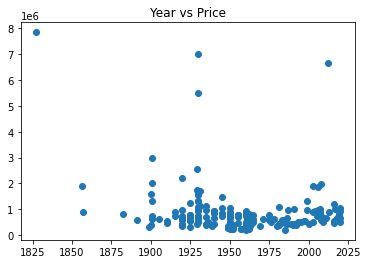

In [10]:
plt.scatter(year,price)
plt.title("Year vs Price")
plt.show()